## Week 4 : Regularization & Dimensionality Reduction 
```
- Machine Learning, Innopolis University (Fall semester 2022)
- Professor: Adil Khan
- Teaching Assistant: Gcinizwe Dlamini
```
<hr>


```
Lab Plan
1. Regularization : Lasso and Ridge
2. Selecting optimal alpha for regularization
3. Dimensionality Reduction from scratch with numpy
4. Dimensionality Reduction with Sklearn
```

<hr>


## 1. Regularization : Lasso and Ridge

Both models are the regularized forms of the linear regression.
Lasso with L1 regularization and Ridge with L2 regularization.
Both act as a constraint region for the coeffeicients/weight, where they must reside in.

### Issues:
1. When to use Lasso?
<span style="color:blue">

    1. Used when there are only a few predictors actually impact the response.
    2. It can be used as a feature selection algorithm, with the appropriate value of lambda, a sparse model can be produced.
2. When to use Ridge?
<span style="color:blue">
Used when there are many of predictors and most of them influence the response.

3. Since it is hard to decide the parameters influence, How we can decide which regularization? and decide the value of lambda?
<span style="color:blue">
Using the cross validation!


### 1.1 Loading California housing dataset

Housing-Prices Values in Suburbs of California

In [36]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

X, y = fetch_california_housing(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1/8, random_state=123)

### 1.2 Fitting both Lasso and Ridge
<span style="color:red">Task:  Fit two models: Lasso and Ridge - with the default alpha.
Then print their coefficients and notice the difference.</span>

In [37]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso()
ridge = Ridge()
lasso.fit(x_train, y_train)
ridge.fit(x_train, y_train)

print("Lasso Coefficient", lasso.coef_)
print("Ridge Coefficient", ridge.coef_)

Lasso Coefficient [ 1.47603065e-01  5.29413055e-03  0.00000000e+00 -0.00000000e+00
 -7.41147208e-06 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
Ridge Coefficient [ 4.41229578e-01  9.08581845e-03 -1.13972707e-01  6.50328073e-01
 -8.46621287e-06 -4.53044362e-03 -4.15242754e-01 -4.25974552e-01]


### 1.3 Searching for optimal $\alpha$

<span style="color:red"><strong>Task</strong>: Let's try different values for alpha for Lasso regressor and plot the validation loss.</span>

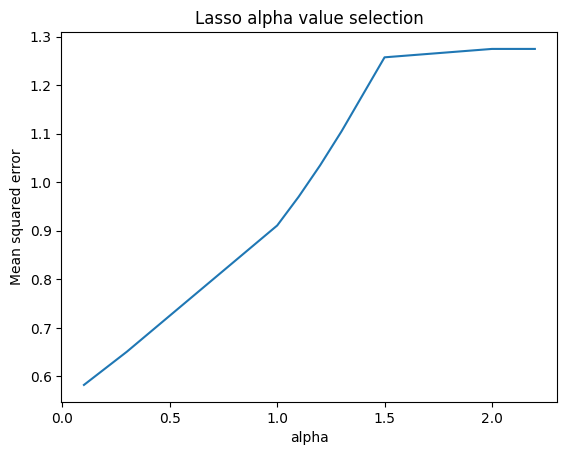

Best value of alpha: 0.1


In [38]:
import matplotlib.pylab as plt
import numpy as np
from sklearn.metrics import mean_squared_error
%matplotlib inline

alphas = [2.2, 2, 1.5, 1.3, 1.2, 1.1, 1, 0.3, 0.1]
losses = []
for alpha in alphas:
    # Write (5 lines): create a Lasso regressor with the alpha value.
    # Fit it to the training set, then get the prediction of the validation set (x_val).
    # calculate the mean sqaured error loss, then append it to the losses array
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    y_pred = lasso.predict(x_val)
    mse = mean_squared_error(y_val, y_pred)
    losses.append(mse)
plt.plot(alphas, losses)
plt.title("Lasso alpha value selection")
plt.xlabel("alpha")
plt.ylabel("Mean squared error")
plt.show()

best_alpha = alphas[np.argmin(losses)]
print("Best value of alpha:", best_alpha)

Measuring the loss on the testset with Lasso regressor with the best alpha.

In [39]:
lasso = Lasso(best_alpha)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
print("MSE on testset:", mean_squared_error(y_test, y_pred))

MSE on testset: 0.603544575502771


## 2. Principal Component Analysis (PCA)

1. How does PCA reduce data dimensionality? <span style="color:blue"> It linearly transforms initial data points by projecting them to new axes - the ones that explaim maximum amount of variance. </span>
2. What is eigenvector? <span style="color:blue">  Characteristic vector of a linear transformation - a nonzero vector that changes at most by a scalar factor (eigenvector) when that linear transformation is applied to it. </span>

<span style="color:red"><strong>Task:</strong> Now you will implement basic steps of PCA: mean-centering, eigenvectors calculation using covariance matrix, projecting data to the first PC, and restoring it back.</span>

### 2.1 Generating data 

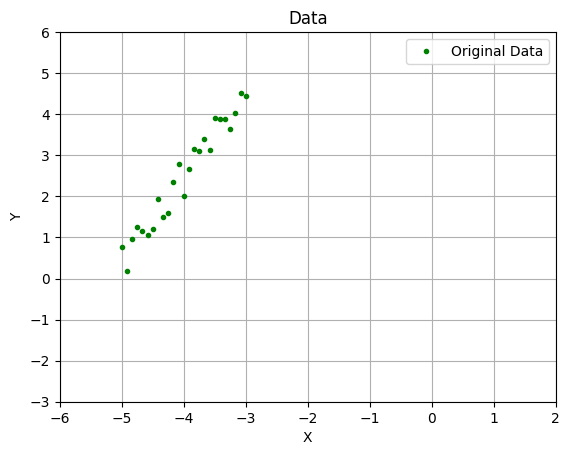

In [40]:
# N is a sample size
N = 25
# we can fix a random seed. It allows us to get the same data
np.random.seed(10)
# form our data
x = np.linspace(-5, -3, N)
y = 10 + 2*x + np.random.random(size=(N,))
data = np.stack([x,y], axis = 1)


plt.title("Data")
plt.plot(data[:,0], data[:,1], '.', label='Original Data', color="green")
plt.legend()

plt.axis([-6, 2, -3, 6])
plt.xlabel("X")
plt.ylabel("Y")
plt.grid('True')

### 2.2 Centering Data

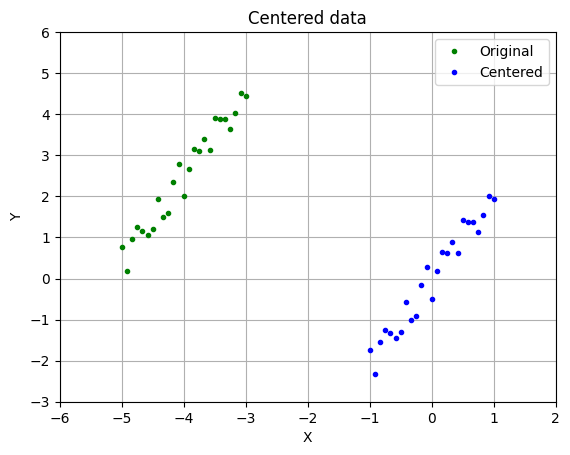

In [41]:
# center data by subtracting mean value from each feature
# pay attention to mean_vector <-- we need it later for restoring our data
mean_vector = np.mean(data, axis=0)
data_centered = data - mean_vector

plt.title("Centered data")
plt.plot(data[:,0], data[:,1], '.', color="green", label="Original")
plt.plot(data_centered[:,0], data_centered[:,1], '.', color="blue", label="Centered")
plt.axis([-6, 2, -3, 6])
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.grid('True')

### 2.3 Covariance matrix

In [42]:
# calculate covariance matrix for our centered data
cov_mat = np.cov(data_centered.T)
print('Covariance matrix:\n', cov_mat)

# also, to make sure you understand how to calculate covariance, calculate and print cov(X,Y)
# check that it is the same as in the covariance matrix
cov_xy = 1/(N-1) * np.sum(data_centered[:,0] * data_centered[:,1])
print('\ncov(X,Y):', cov_xy)

Covariance matrix:
 [[0.37615741 0.76801889]
 [0.76801889 1.65019543]]

cov(X,Y): 0.7680188927863001


### 2.4 Eigenvectors and eigenvalues

In [43]:
# compute eigenvectors and eigenvalues, print them
eig_values, eig_vectors = np.linalg.eig(cov_mat)
print('Eigenvalues:', eig_values)
print('Eigenvectors:\n', eig_vectors)

# are they already in the needed order?
# order eigenvectors and eigenvalues by eigenvalues, descending
idx = eig_values.argsort()[::-1]
# print(idx)
eig_values = eig_values[idx]
eig_vectors = eig_vectors[:,idx]
print('\nsorted eigenvalues:', eig_values)
print('sorted Eigenvectors:\n', eig_vectors)

# estimate variance retained by each principal component
retained_var = eig_values / eig_values.sum()
print('\nRetained variance:',   retained_var)

Eigenvalues: [0.01535567 2.01099716]
Eigenvectors:
 [[-0.90509952 -0.42519979]
 [ 0.42519979 -0.90509952]]

sorted eigenvalues: [2.01099716 0.01535567]
sorted Eigenvectors:
 [[-0.42519979 -0.90509952]
 [-0.90509952  0.42519979]]

Retained variance: [0.99242201 0.00757799]


### 2.5 Project data

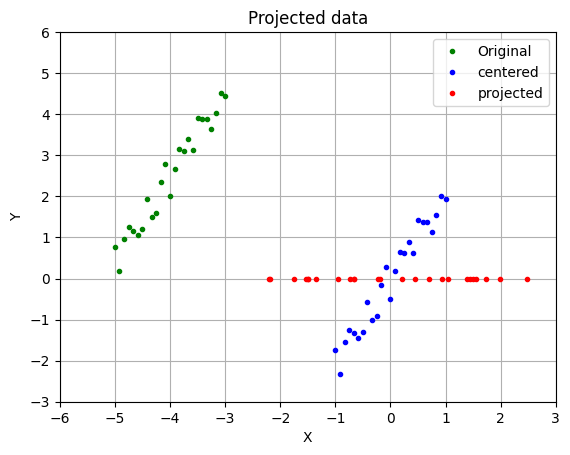

In [44]:
# project data to the first principal component
first_pc = np.expand_dims(eig_vectors[:,0], axis=1)
projected_data = np.dot(data_centered, first_pc)

plt.title("Projected data")
plt.plot(data[:,0], data[:,1], '.', color="green", label="Original")
plt.plot(data_centered[:,0], data_centered[:,1], '.', color="blue", label="centered")
plt.plot(projected_data, np.zeros(len(projected_data)), '.', color="red",  label="projected")
plt.axis([-6, 3, -3, 6])
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.grid('True')

### 2.6 Restore data back 

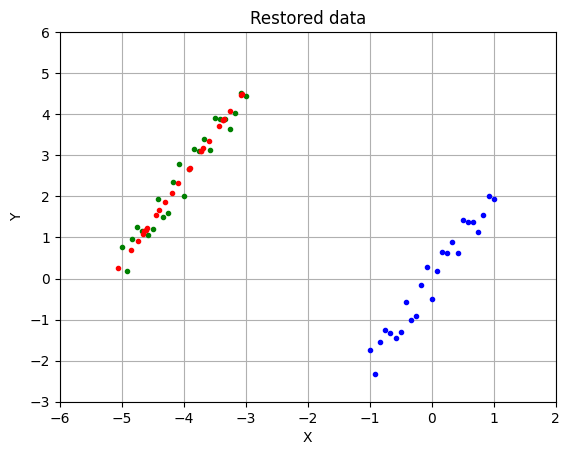

In [45]:
# project data back to initial space
# remember to add a mean_vector to the restored data
restored_data = np.dot(projected_data, first_pc.T) + mean_vector

plt.title("Restored data")
plt.plot(data[:,0], data[:,1], '.', color="green")
plt.plot(data_centered[:,0], data_centered[:,1], '.', color="blue")
plt.plot(restored_data[:,0], restored_data[:,1], '.', color="red")
plt.axis([-6, 2, -3, 6])
plt.grid('True')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## 3. SKLEARN implementation 

Mean :  [-4.          2.50055666]
explained variance :  [2.01099716]
explained variance ratio:  [0.99242201]


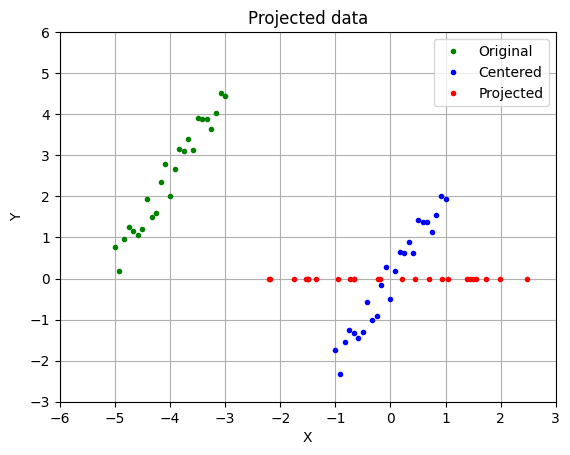

In [46]:
# this is to check your solution
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
x_PCA = pca.fit_transform(data)

plt.title("Projected data")
plt.plot(data[:,0], data[:,1], '.', color="green", label="Original")
plt.plot(data_centered[:,0], data_centered[:,1], '.', color="blue", label="Centered")
plt.plot(x_PCA, np.zeros(len(projected_data)), '.', color="red", label="Projected")
plt.axis([-6, 3, -3, 6])
plt.xlabel("X")
plt.ylabel("Y")
plt.grid('True')
plt.legend()

print('Mean : ',pca.mean_)
print('explained variance : ',pca.explained_variance_)
print('explained variance ratio: ',pca.explained_variance_ratio_)

## <center>Self-Practice  Task</center>

* Using `covid19-2.csv` dataset given to you in previous self practice task.
    1. Train a logistic regression model with Regularization
    1. Train a logistic regression model with data after PCA
    1. Calculate Accuracy, Precision and Recall values for each of the above trained models



In [47]:
import pandas as pd
import numpy as np
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('./materials/covid19-2.csv', low_memory=False)
df.drop(['test_date'], axis = 1, inplace=True)

In [48]:
Y_data = df['corona_result']
df.drop(['corona_result','medical_id'], axis=1, inplace=True)

In [49]:
Y_data = (Y_data == 'Positive').astype(int)
Y_data[:5]

0    0
1    0
2    1
3    0
4    0
Name: corona_result, dtype: int32

In [50]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test, = train_test_split(df,Y_data, test_size=0.2)

In [51]:
categ_cols = list(x_train.select_dtypes(['object']).columns)
categ_cols

['age_60_and_above', 'gender', 'test_indication']

In [52]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
x_train.iloc[:,6:8] = imputer.fit_transform(x_train.iloc[:,6:8])

In [53]:
from category_encoders import OneHotEncoder

encoder = OneHotEncoder(cols=categ_cols)
encoder.fit(x_train)
x_train = encoder.transform(x_train)
x_test = encoder.transform(x_test)

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(penalty="l2").fit(x_train,y_train)
y_pred = logistic.predict(x_test)
y_pred_train = logistic.predict(x_train)
print('Accuracy on testset', accuracy_score(y_test, y_pred))
print('Precision on testset', precision_score(y_test, y_pred))
print('Recall on testset', recall_score(y_test,y_pred))
print('\nAccuracy on trainset', accuracy_score(y_train, y_pred_train))
print('Precision on trainset', precision_score(y_train, y_pred_train))
print('Recall on trainset', recall_score(y_train,y_pred_train))

Accuracy on testset 0.9054545454545454
Precision on testset 0.5365853658536586
Recall on testset 0.10426540284360189

Accuracy on trainset 0.9061363636363636
Precision on trainset 0.4131455399061033
Recall on trainset 0.11153358681875793


In [56]:
from sklearn.decomposition import PCA

dim_reducer = PCA(n_components=2)
x_train = dim_reducer.fit_transform(x_train)
x_test = dim_reducer.fit_transform(x_test)

In [57]:
logistic = LogisticRegression(penalty="l2").fit(x_train,y_train)
y_pred = logistic.predict(x_test)
y_pred_train = logistic.predict(x_train)
print('Accuracy on testset', accuracy_score(y_test, y_pred))
print('Precision on testset', precision_score(y_test, y_pred))
print('Recall on testset', recall_score(y_test,y_pred))
print('\nAccuracy on trainset', accuracy_score(y_train, y_pred_train))
print('Precision on trainset', precision_score(y_train, y_pred_train))
print('Recall on trainset', recall_score(y_train,y_pred_train))

Accuracy on testset 0.9027272727272727
Precision on testset 0.4666666666666667
Recall on testset 0.0995260663507109

Accuracy on trainset 0.9054545454545454
Precision on trainset 0.3837837837837838
Recall on trainset 0.08998732572877059
